# Impact of Internet Access on Student Performance

## Introduction

One way to measure a student’s math ability is their final class grade. Different factors can influence this final grade. We propose studying how internet access at home may impact students' final grade, with our population being all students. Our question is the following: do students with internet access at home have higher mean final math grades than students without internet access at home?  

There are a few reasons why we chose this topic. For one, we wanted our question to involve students as it makes this project personal and relevant, and therefore more interesting to us. This question is also relevant due to the prevalence of wifi-requiring tools used in education today. 

Our location parameter is the mean final grade, and our scale parameter is the standard deviation. The range of our response variable is small (0 to 20) and therefore outliers won't be overly influential on the mean and standard deviation. 

## Description of the Data Set

The sample we use is from the The Student Performance Data Set, created by two researchers, Paulo Cortez and Alice Silva, in 2008. They obtained the performance of secondary students from 2 Portuguese schools in math by collecting school reports and questionnaires to create a data set that consists of 33 columns with 395 rows that correspond to the number of students that participated in the study.  

Previous studies have shown that the internet has led to an increase in grades if used optimally (Austin & Totaro, 2011) and that the majority of teachers are now using the internet as a teaching and learning tool (Sampath & Manjunath, 2013). Therefore, we are interested in analyzing the impact of internet access at home to students' final grade. 

We will be using the internet column as our explanatory variable and the G3 attribute as our response variable. The internet column is a binary variable that describes whether or not the student has internet access at home. The G3 column is a quantitative variable that describes the final year Mathematics grade of the student (from 0-20).

## Preliminary Analysis

In [1]:
# Loading needed libraries
library(tidyverse)
library(cowplot)
library(infer)
library(broom)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Reading the data from our GitHub repository 
url <- "https://raw.githubusercontent.com/PrayusShrestha/stat-201-project/main/data/student-mat.csv"
raw_data <- read_delim(url, delim = ";")
head(raw_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


From the tibble above, we see that the raw data we read is already in a tidy format. Each row is an observation, each column is a variable, and each cell is a value (Data Science: A First Introduction). Over the next few code cells, we will be renaming columns to be more readable (`G3` becomes `final_grade`), selecting the relevant columns (`internet` and `final_grade`) and checking if null values exist (and dealing with them if they do exist). We will then check the count of students with and without internet access. Finally, we will calculate summary statistics. 

In [3]:
# Selecting for just the relevant columns and changing column name to be more human readable
data <- raw_data  %>% 
    mutate(final_grade = G3)  %>% 
    select(internet, final_grade)
head(data)

internet,final_grade
<chr>,<dbl>
no,6
yes,6
yes,10
yes,15
no,10
yes,15


In [4]:
# Checking if any rows have null values 
num_of_na_internet <- sum(is.na(data$internet))
num_of_na_final_grade <- sum(is.na(data$final_grade))

num_of_na_internet
num_of_na_final_grade

[1] 0

[1] 0

From above, it can be seen there there are no NA values.

In [5]:
# Counting how many of each category (access, or no access, to internet at home) are in the sample 
internet_access_tally <- data %>%
    group_by(internet) %>%
    tally()

internet_access_tally

internet,n
<chr>,<int>
no,66
yes,329


In [6]:
# Generating summary statistics (standard deviation and mean)
data_summary  <- data  %>% 
    group_by(internet)  %>% 
    summarize(std_dev = sd(final_grade),
              mean_final_grade = mean(final_grade))
data_summary

internet,std_dev,mean_final_grade
<chr>,<dbl>,<dbl>
no,4.485797,9.409091
yes,4.580494,10.617021


The table above shows the mean and standard deviation of final math grades, split by home internet access status.

We will now create three histograms and one box and whisker plot to visualize the data and show its center, spread, and shape. 

In [40]:
# 4 plots of the relevant raw data

# Plot 1: Final Grade Distribution of Students Without Internet Access
plot_no_internet <- data  %>% 
    filter(internet == "no")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2) + 
    geom_vline(xintercept = data_summary$mean_final_grade[1]) + 
    xlab("Final Grade") + 
    ggtitle("Figure 1: Final Grade Distribution Students Without Internet Access") 

# Plot 2: Final Grade Distribution of Students With Internet Access
plot_have_internet <- data  %>% 
    filter(internet == "yes")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = data_summary$mean_final_grade[2]) + 
    xlab("Final Grade") + 
    ggtitle("Figure 2: Final Grade Distribution Students With Internet Access")

# Plot 3: Final Grade Distribution of Students With and Without Internet
plot_both <- ggplot(data, aes(x = final_grade, fill = internet)) + 
    geom_histogram(binwidth = 2, alpha = 0.5, position = "identity", aes(y = ..density..)) + 
    xlab("Final Grade") + 
    ggtitle("Figure 3: Final Grade Distribution Students With and Without Internet")

# Plot 4: Boxplot with Final Grade Distribution Students With and Without Internet
boxplot  <- ggplot(data = data, mapping = aes(x = internet, y = final_grade)) +
    geom_boxplot() +
    ggtitle("Figure 4: Boxplot of Final Grade Distribution Students With and Without Internet") + 
    labs(x = "Internet Access", y = "Final Grade")

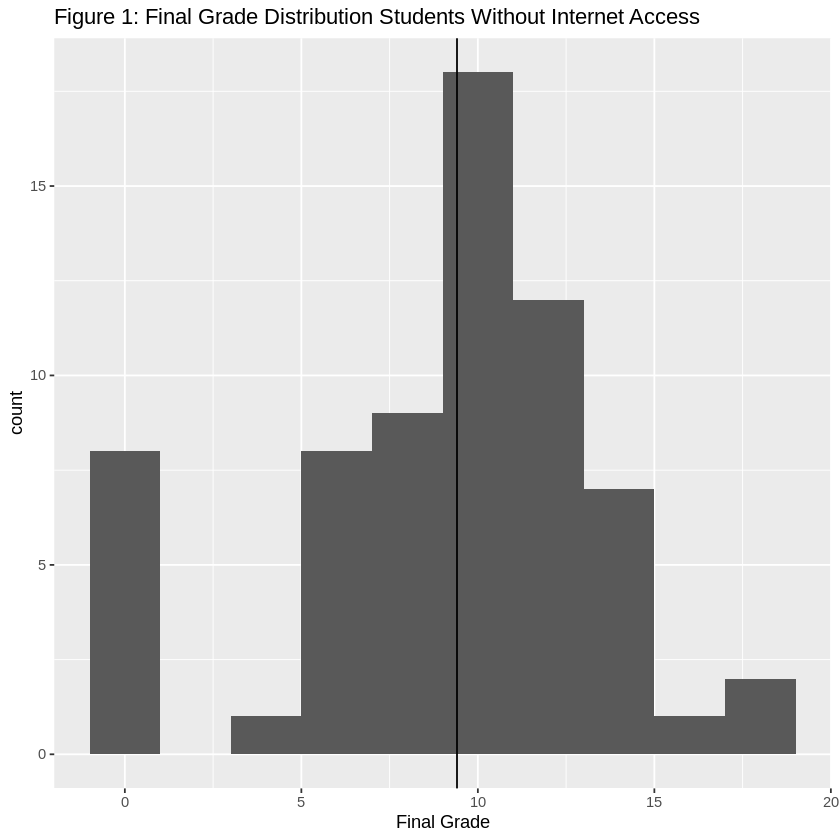

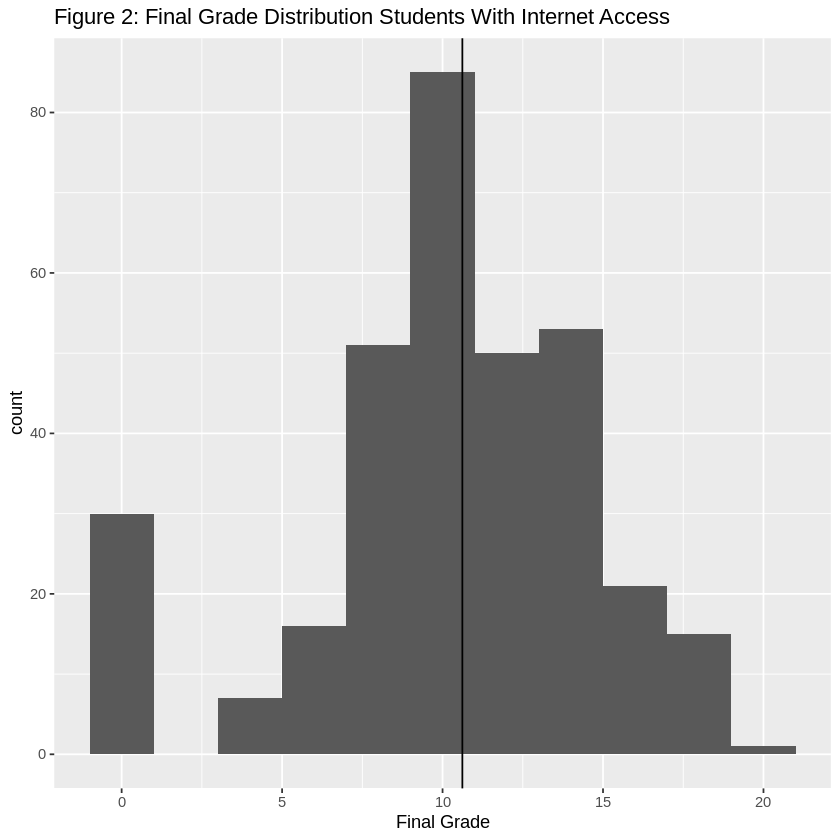

In [41]:
plot_no_internet
plot_have_internet

The 2 histograms above each show a subset of our sample distribution, with each histogram having data filtered based on whether the student did or didn't have access to the internet at home. The vertical line represents their corresponding mean. In general, we can see a rough bell curve being formed; for both plots, there seems to be a spike of people who got a 0. 

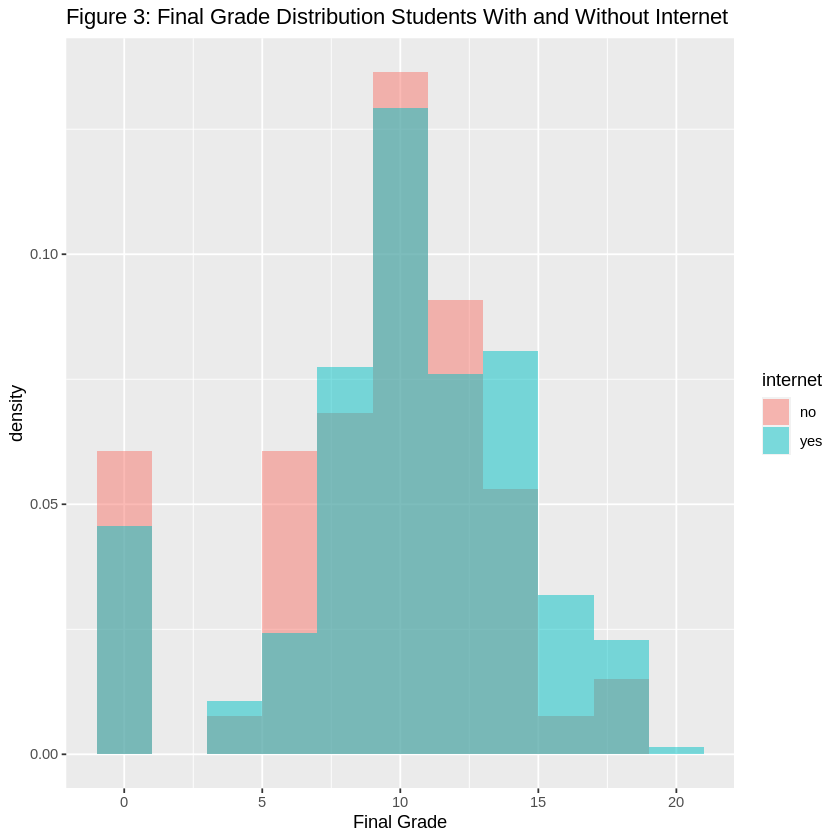

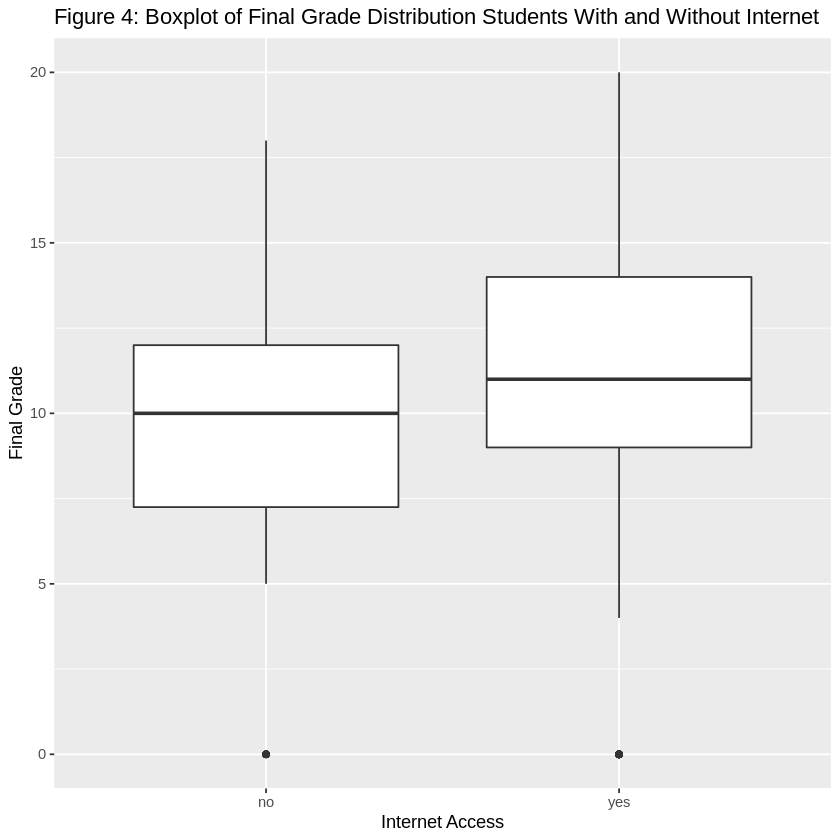

In [9]:
plot_both 
boxplot

In Figure 3, we observe that the data coloured blue (representing those with home internet access) seems to be shifted to the right (ie. towards a higher final grade) when compared to the light blue of those without internet access. 

Figure 4 tells a similar story to the previous histogram. It has the "yes" column (those with home internet access) having a higher median (and first and third quantiles) compared to the "no" column. 

## **Methods**

<p> In this analysis, we are drawing from a data set that is unbiased and representative. By explaining our work and decision-making along the way, we produce a reproducible and trustworthy report. <br>

Based on Figure 3, we can hypothesize that students with internet access perform better than those without. This analysis of the data is limiting because we only have access to sample distributions and we do not have a measure of confidence or reliability for the means. To extend our analysis, we can conduct a hypothesis test and construct a confidence interval for the difference of means of both groups of students. 
    
#### **Hypothesis Test:**
$m_1:$ the mean grade of students *with* internet access <br>
$m_2:$ the mean grade of students *without* internet access
 
##### **Null hypothesis:**
$H_o: m_1 - m_2 = 0$
##### **Alternative hypothesis:**
$H_a: m_1 - m_2 > 0$
##### **Significance Level:** 0.05
 
<p> We expect that we will be able to reject our null hypothesis at a 5% significance level. In other words, we can show evidence that the mean grade of students without internet access is lower than the mean grade of students with internet access. 


## **Analysis**

### Bootstrapping Confidence Interval

We are going to begin by creating a bootstrap sampling distribution for the difference in mean final grades between our two samples. This will help us create a plausible range of values for the actual difference in means, also known as a confidence interval.

First, we will use the infer workflow to create a bootstrap sampling distribution with 1000 replicates and then visualize it.

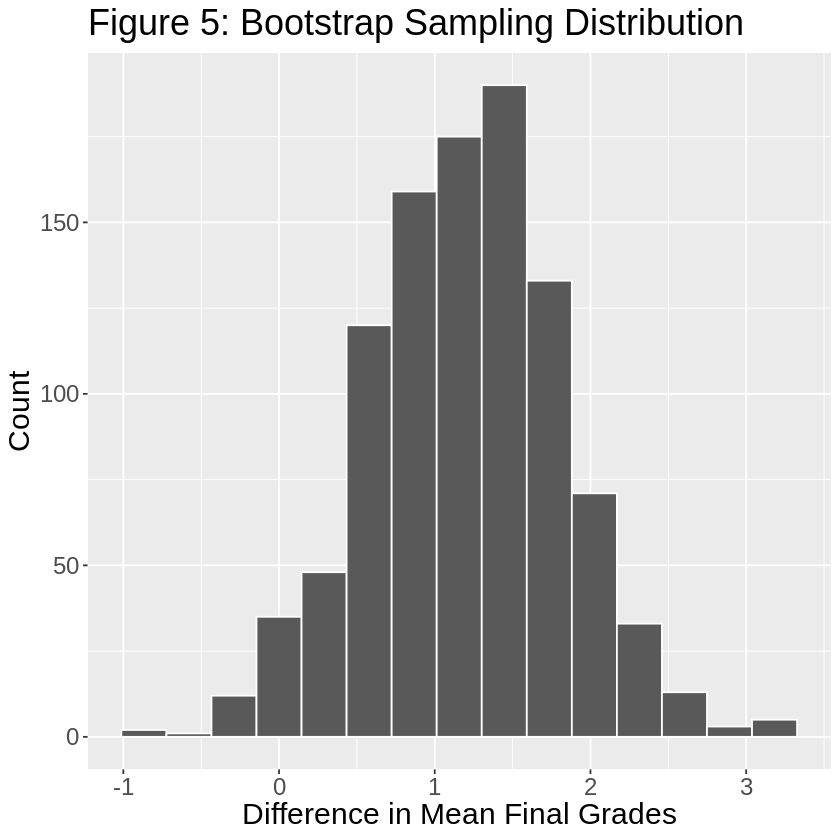

In [48]:
set.seed(1)

bootstrap_distribution <- data %>% 
  specify(formula = final_grade ~ internet) %>%   
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "diff in means", order = c("yes", "no"))

boot_dist_plot <- visualize(bootstrap_distribution) +
theme(text = element_text(size = 18)) +
ggtitle("Figure 5: Bootstrap Sampling Distribution") +
xlab("Difference in Mean Final Grades") +
ylab("Count")

boot_dist_plot 


We can see that the center of this plot is around 1.25. That means that on average someone with internet access has a grade about 1.25 points (out of 20) higher than someone without internet access.

We can calculate the exact mean of the bootstrap sampling distribution using the infer workflow.

In [49]:
obs_diff_mean <- data %>% 
  specify(final_grade ~ internet) %>% 
  calculate(stat = "diff in means", order = c("yes", "no")) %>%
  pull()
obs_diff_mean

[1] 1.20793

Our estimate was pretty close, the mean of our bootstrap sampling distribution is actually about 1.208.

Now we can create a 95% confidence interval for our parameter, the actual difference of means between the two groups.

In [50]:
ci <- bootstrap_distribution %>%
get_ci(level = 0.95, type = "percentile")
"Figure 6"
ci

[1] "Figure 6"

lower_ci,upper_ci
<dbl>,<dbl>
-0.05574639,2.400558


Our 95% confidence interval is -0.05574639 to 2.43882. These values are the 2.5th and 97.5th percentiles, respectively, of our bootstrap distribution. We are 95% confident that the true difference in mean final grades lies within this interval. In other words, if we take many many samples and calculate their difference in mean final grades, we expect that those values will fall within this confidence interval 95% of the time.

### Asymptotics Confidence Interval

Now we will calculate the 95% confidence interval using asymptotics. The formula we need to use to calculate the confidence interval is the following:

${{m_1}-{m_2} - 0} \pm qt(0.975, n_1 + n_2 -2) \times {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }$


Let's start by calculating the mean  variance of the final grades of our two groups, yes internet and no internet. We will also count up the sample size of each group.

In [32]:
"Figure 7"
internet_summary <- 
    data %>% 
    group_by(internet) %>% 
    summarise(sample_mean = mean(final_grade), 
              sample_var = var(final_grade), 
              n = n())
internet_summary

[1] "Figure 7"

internet,sample_mean,sample_var,n
<chr>,<dbl>,<dbl>,<int>
no,9.409091,20.12238,66
yes,10.617021,20.98093,329


Now let's use our formula to calculate the confidence interval.

In [33]:
diff <- internet_summary$sample_mean[2] - internet_summary$sample_mean[1]

se <- sqrt(internet_summary$sample_var[2]/internet_summary$n[2] + 
     internet_summary$sample_var[1]/internet_summary$n[1])

df <- internet_summary$n[2] + internet_summary$n[1] - 2

ci <- tibble(lower_ci = diff - qt(0.975, df)*se,
             upper_ci = diff + qt(0.975, df)*se)
"Figure 8"
ci

[1] "Figure 8"

lower_ci,upper_ci
<dbl>,<dbl>
0.01422135,2.401639


This confidence interval is fairly similar to the one we got using bootstrapping. As it is also a 95% confidence interval, it has the same interpretation. We are 95% confident that the true difference in mean final grades lies within this interval. 

It's worth noting that the null hypothesis value of 0 does fall within our first confidence interval, but not the second. If we are 95% confident that the true difference in mean final grades lies within each confidence interval, and our null value does not, then at a 95% confidence level we should reject the null hypothesis .

### Permute Hypothesis Test

Now we will conduct a permute hypothesis test. This code is quite similar to the one we used to create the bootstrap distribution. The differences are that now we introduce the null hypothesis and we use permutations which is more suitable for hypothesis testing.

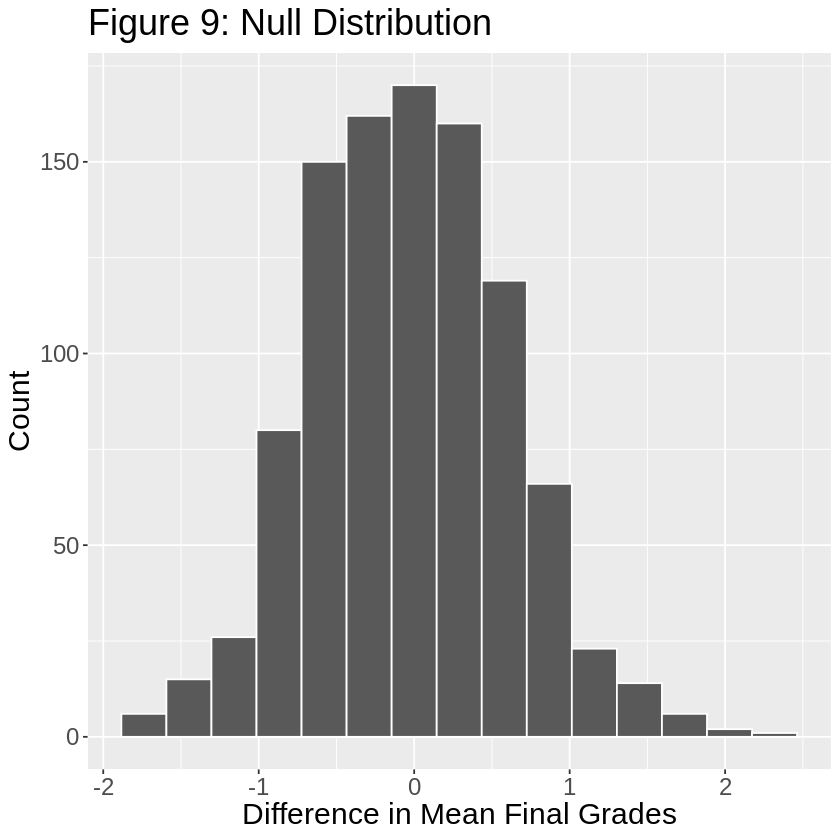

In [45]:
set.seed(1)

null_distribution <- data %>% 
  specify(formula = final_grade ~ internet) %>%   
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("yes", "no"))

perm_plot <- visualize(null_distribution)  +
theme(text = element_text(size = 18)) +
ggtitle("Figure 9: Null Distribution") +
xlab("Difference in Mean Final Grades") +
ylab("Count")

perm_plot 

We can notice that unlike our bootstrap distribution, our null distribution is centered on 0.

Now we will visualize our p-value.

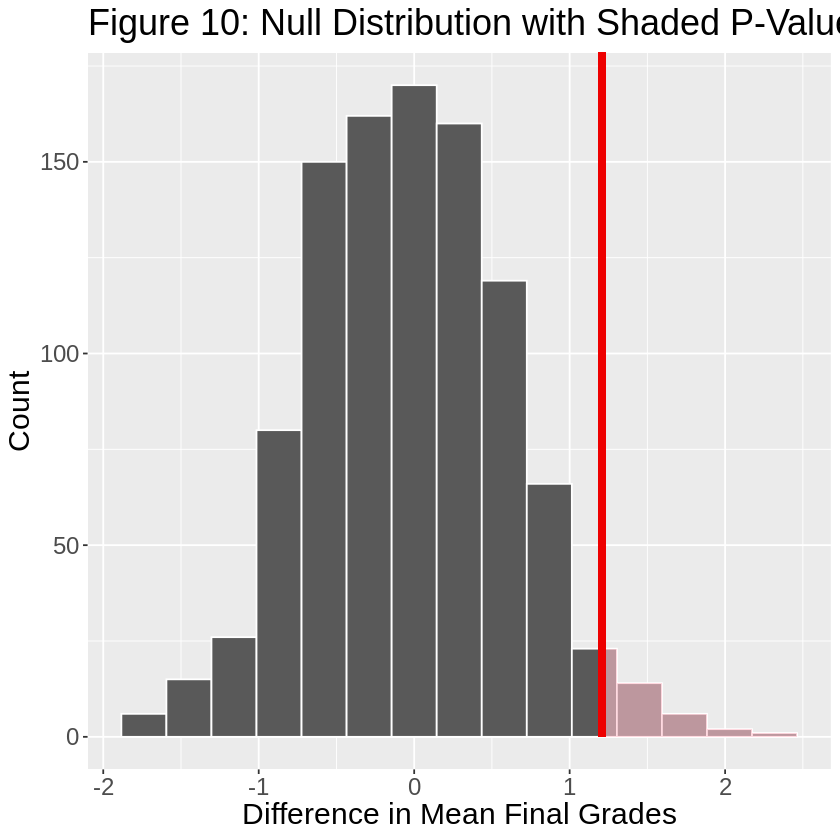

In [46]:
perm_p_plot <- visualize(null_distribution)  +
theme(text = element_text(size = 18)) +
ggtitle("Figure 10: Null Distribution with Shaded P-Value") +
xlab("Difference in Mean Final Grades") +
ylab("Count") +
shade_p_value(obs_stat = obs_diff_mean, direction = "right")

perm_p_plot

And we will calculate the p-value.

In [47]:
p_value <- null_distribution %>%
get_p_value(obs_stat = obs_diff_mean, direction = "right")
"Figure 11"
p_value

[1] "Figure 11"

p_value
<dbl>
0.029


Our p-value from the permutation test is 0.029. This is below our significance level of 0.05. Therefore, we reject our null hypothesis and conclude that there is evidence suggesting an association between access to internet at home and mean final math grades.

### Two-Sample T-Test

Finally we will conduct a two-sample t-test.

In [37]:
model <- t.test(data %>% filter(internet == "yes") %>% pull(final_grade),
                data %>% filter(internet == "no") %>% pull(final_grade),
                alternative = "greater")
"Figure 12"
tidy(model)

[1] "Figure 12"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.20793,10.61702,9.409091,1.989441,0.02477601,94.21865,0.1993059,Inf,Welch Two Sample t-test,greater


TODO: Breifly talk about the other values in the table

TODO: Maybe calculate degrees of freedom with formula

Our p-value from the permutation test is 0.025. This p-value is also below our significance level of 0.05. Therefore, again, we reject our null hypothesis and conclude that there is evidence suggesting an association between access to internet at home and mean final math grades.

## Discussion

    
These findings could inform education decision-makers as to the best ways to support their students and improve overall scores. Specifically, governments should invest in providing students with internet access outside of school hours and at home. 
    
Because this research looks at how technology enables education to continue at home, we might ask more questions about these environments and how they impact students. For example, we might ask if students with their own device(s) perform better than students who share devices with their family. Also, we might ask if students whose guardians have high technology and internet literacy perform better than students whose guardians do not. Like our research, these findings might inform government education spending and investments in technology for students.




## References

Austin, W., & Totaro, M. W. (2011). High school students academic performance and internet usage. *Journal of Economics and Economic Education Research, 12*(1), 41–54.


Cortez, P., & Silva, A. M. G. (2008). Using Data Mining to Predict Secondary School Student Performance. *In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto*, 5-12.



Sampath Kumar, B. T., & Manjunath, G. (2013). Internet use and its impact on the academic performance of university teachers and researchers: A comparative study. *Emerald Journal of Higher Education, Skills and Work-Based Learning, 3*(3), 219–238.